# Markov Chain - Stationary Distribution
### State

In [1]:
import numpy as np
states = [0,1,2,3]
N_STATES = len(states) 

### Transition probability

In [2]:
P = np.empty((N_STATES, N_STATES))
l = 0.3
r = 0.3
s = 1-l-r

P[0, :] = [s+l, r, 0, 0]
P[1, :] = [l, s, r, 0]
P[2, :] = [0, l, s, r]
P[3, :] = [0, 0, l, s+r]
print(P) 

[[0.7 0.3 0.  0. ]
 [0.3 0.4 0.3 0. ]
 [0.  0.3 0.4 0.3]
 [0.  0.  0.3 0.7]]


### Initial State

In [3]:
np.random.seed(3)
state = np.random.choice(states)
print(state) 

2


### Simulation

In [4]:
num_steps = 500

visit_log = np.zeros((N_STATES, num_steps))
for step in range(num_steps):
    visit_log[state, step] = 1.
    next_state = np.random.choice(states, p=P[state, :])
    state = next_state
print(visit_log) 

[[0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 1. 1. 0.]
 [1. 0. 1. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]]


In [5]:
print(np.cumsum(visit_log, axis=1)) 

[[  0.   0.   0. ... 109. 109. 109.]
 [  0.   1.   1. ... 118. 119. 119.]
 [  1.   1.   2. ... 128. 128. 129.]
 [  0.   0.   0. ... 143. 143. 143.]]


In [6]:
pi = np.cumsum(visit_log, axis=1) / (np.arange(num_steps)+1).reshape((1,-1))
print(np.round(pi, 2))

[[0.   0.   0.   ... 0.22 0.22 0.22]
 [0.   0.5  0.33 ... 0.24 0.24 0.24]
 [1.   0.5  0.67 ... 0.26 0.26 0.26]
 [0.   0.   0.   ... 0.29 0.29 0.29]]


### Plot

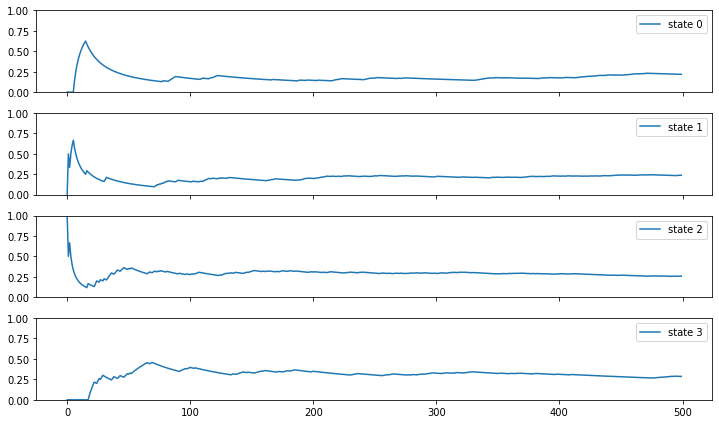

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
#plt.style.use(['dark_background'])  # 배경이 어두울 때 tick이 안보이는 문제 해결

fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(10, 6), sharex=True)
for i in range(N_STATES):
    axes[i].plot(pi[i], label="state {}".format(str(i)))
    axes[i].legend(loc='upper right')
    axes[i].set_ylim([0., 1.])
plt.tight_layout()
plt.show()